In [3]:
import pandas as pd
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.groupby('version')['version'].count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [5]:
plot_df = df.groupby('sum_gamerounds').count().reset_index()
plot_df.head()

,sum_gamerounds,userid,version,retention_1,retention_7
0,0,3994,3994,3994,3994
1,1,5538,5538,5538,5538
2,2,4606,4606,4606,4606
3,3,3958,3958,3958,3958
4,4,3629,3629,3629,3629


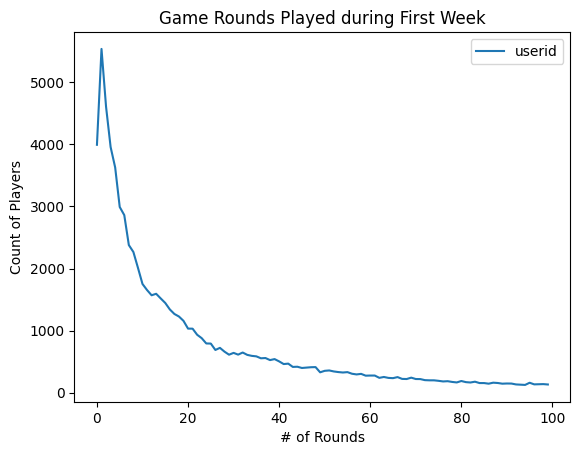

In [6]:
%matplotlib inline

plot_df = df.groupby('sum_gamerounds').count().reset_index()
ax = plot_df.head(n=100).plot('sum_gamerounds', 'userid')
ax.set_xlabel("# of Rounds")
ax.set_ylabel("Count of Players")
ax.set_title("Game Rounds Played during First Week");

лояльность после 1 дня 

In [7]:
df['retention_1'].mean()

0.4452095044850259

лояльность после 1 дня игры (AB группа)

In [8]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

разница между АВ группой 

Text(0.5, 0, 'Mean 1-Day Retention')

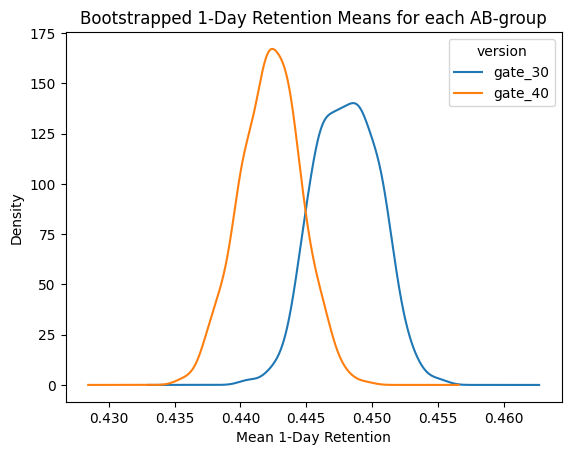

In [9]:
boot_1d = []
iterations=500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby(
        'version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    

boot_1d = pd.DataFrame(boot_1d)
    
ax = boot_1d.plot.kde()
ax.set_title('Bootstrapped 1-Day Retention Means for each AB-group')
ax.set_xlabel('Mean 1-Day Retention')

Увеличим разницу

In [10]:
boot_1d.head()

version,gate_30,gate_40
retention_1,0.446445,0.439427
retention_1,0.447446,0.442025
retention_1,0.448498,0.444820
retention_1,0.445412,0.443231
retention_1,0.444226,0.438049


Text(0.5, 1.0, 'Bootstrap % Difference in 1-Day Retention Means')

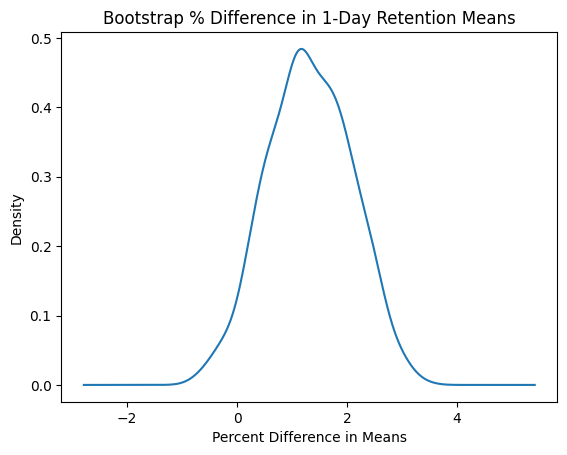

In [11]:
boot_1d['diff'] = ((boot_1d.gate_30 - boot_1d.gate_40)
                   / boot_1d.gate_40 * 100)


ax = boot_1d['diff'].plot.kde()
ax.set_xlabel('Percent Difference in Means')
ax.set_title('Bootstrap % Difference in 1-Day Retention Means')

вероятность различия

In [12]:
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
'{0:.1%}'.format(prob)

'96.6%'

анализ 7-дневной лояльности группы АВ

In [13]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Повторный анализ разницы между 1-дневной и 7-дневной лояльностью

'100.0%'

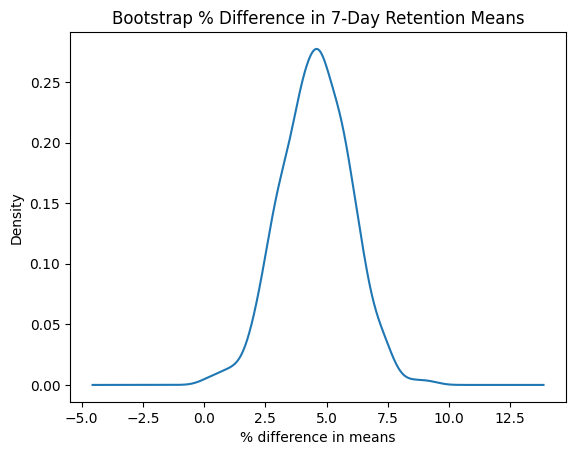

In [14]:
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    

boot_7d = pd.DataFrame(boot_7d)


boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / 
                   boot_7d['gate_40'] * 100)


ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")
ax.set_title('Bootstrap % Difference in 7-Day Retention Means')


prob = (boot_7d['diff'] > 0).mean()

'{0:.1%}'.format(prob)

Вывод таков: если мы хотим сохранить удержание на высоком уровне — как 1-дневное, так и 7-дневное — нам не следует перемещать ворота с 30-го уровня на 40-й. Конечно, есть и другие показатели, на которые мы могли бы обратить внимание, например, количество сыгранных игровых раундов или количество внутриигровых покупок, сделанных двумя AB-группами.  

In [ ]:
move_to_level_40 = False